# Zalando example

What does this all cover?

**General (dense layers)**
- Keras
- Multilayer perceptron
- activation functions
- loss function
- matrix notation practice
- hyperparameter testing (trial and error)
- regularization via early stopping (plot validation vs training accuracy)

**CNN**
- convolutional neural nets
- use of all layers: convolution layers, pooling layers, Fully connected layers
- sense of the general layer structure
- show pictures in python
- Visualizing intermediate convnet outputs 
- regularization via dropout
- make a class prediction

**Things I have not done (yet)**
- k-fold cross-validation (yet wonder about the added value at this stage, makes comp time longer. Or should make the data smaller)
- having jpeg images and actually making them manageable to work with (is this done earlier?)
- data augmentation --> need de jpegs to do so
- vanishing/exploding gradients
- L2 regularization
---> sequence processing with convolutional neural networks?


# 1. Introduction

In this example we'll get a sense of just how powerful convolutional neural networks get! This data set, the so-called `Fashion-MNIST` was constructed by a research team at online fashion retailer Zalando.  Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [1]:
import numpy as np
import tensorflow as tf
from utils import mnist_reader
import os
import matplotlib.pyplot as plt
import matplotlib.image  as img

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_images, train_labels = mnist_reader.load_mnist( path = "data_zalando/",kind='train')
test_images, test_labels = mnist_reader.load_mnist(path = "data_zalando/", kind='t10k')

This is a fairly big data set. If we keep it as such, runtimes will be longer. Let's take samples of this data set, so we work with 10,000 training instances and 2,500 test instances. Do remember that working with bigger data is generally always better when it comes to training models and getting more accurate results, longer computation times are pretty much the only downside!

In [3]:
from random import *
import random
index_train = range(0,59999)
index_test= range(0,9999)

random.seed(1109)
train_sample = sample(index_train,  10000)
test_sample = sample(index_test,  2500)

In [4]:
train_images = train_images[train_sample]
train_labels = train_labels[train_sample]
test_images = test_images[test_sample]
test_labels = test_labels[test_sample]

Let's verify the shape of the train_images and test_images

In [5]:
np.shape(train_images)

(10000, 784)

In [6]:
np.shape(test_images)

(2500, 784)

You can see that now, there are 10,000 observations in the training set, each representing 1 image of 28 x 28 pixels, so each observation contains 784 inputs that range between [0,255] (for a greyscale image, going from white to black). Similarly, there are 2500 images in the test set. Let's have a look at a random observation from `train_images`, let's say, the 4th observation.

In [7]:
train_images[3]

array([  0,   0,   0,   0,   2,   1,   0,   1,   1,   1,   0, 146, 173,
       138, 141, 146, 173,   0,   0,   3,   1,   1,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   3,   3,   0,   0,   0,  50,
       231, 244, 248, 249, 249, 232, 148,   0,   0,   0,   0,   3,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,  12,  97,
       173, 213, 190, 228, 255, 245, 245, 186, 202, 176, 103,  39,   0,
         0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 177,
       191, 203, 199, 197, 181, 186, 219, 225, 203, 169, 191, 198, 207,
       196, 203,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       168, 205, 186, 183, 183, 186, 199, 215, 198, 172, 217, 213, 190,
       180, 181, 183, 194, 196,  43,   0,   0,   0,   0,   0,   0,   0,
         0, 113, 209, 184, 188, 188, 188, 188, 183, 185, 207, 148, 186,
       181, 184, 186, 186, 184, 181, 192, 201,   0,   0,   0,   0,   0,
         0,   0,   0, 185, 201, 191, 190, 190, 189, 189, 187, 19

It would be nice if we could actually see what this picture looks like. Note that the form $(n\_obs, total\_n\_pixels)$, which is what we obtained looking at `np.shape(train_images)`, is desirable when training neural networks, but if we want to *visualize* the actual images, we need to reshape $total\_n\_pixels$ to something of the form ($horiz\_pixels$, $vertical\_pixels$). Let's use the numpy function `matrix.reshape` to look at the 4th image.

In [58]:
reshape_example= np.matrix.reshape(train_images[9],28,28)

Let's quickly have a look at how this changed the data structure. Notice how you have an 28 x 28 matrix now!

In [59]:
reshape_example

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02745098, 0.        , 0.3019608 ,
        0.76862746, 0.6431373 , 0.6156863 , 0.61960787, 0.7647059 ,
        0.3372549 , 0.00392157, 0.6313726 , 0.5764706 , 0.        ,
        0.00784314, 0.02352941, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.7607843 ,
        0.78431374, 0.6784314 , 0.88235295, 0.7254902 , 0.7058824 ,
        0.8901961 , 0.7647059 , 0.8235294 , 0.7647059 , 0.        ,
        0.        , 0.03137255, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.84313726,
        0.6392157 , 0.5764706 , 0.7411765 , 0.654902  , 0.8039216 ,
        0.88235295, 0.6509

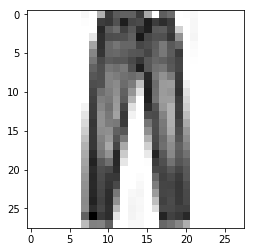

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(reshape_example, cmap=plt.cm.binary)
plt.show()

Remember that the resolution of this image is pretty low, but for this example it's definitely clear that this is a shirt!

Let's look at the labels. As mentioned, there are 10 classes of clothing in this data set. In the `train_labels` (`test_labels`) data set, this means that there are exactly 10,000 (2500) inputs with each input ranging from [0,9].

In [11]:
np.shape(train_labels)

(10000,)

In [12]:
train_labels

array([4, 6, 2, ..., 8, 1, 0], dtype=uint8)

Although we'll keep this decoded version to train and test our model (actually, we'll decode even further and perform one-hot encoding), it would be nice if we could do a sanity check on our data now and verify that the train instances are labeled correctly. The dictionary `cat_dict` contains the so-called "encoding information", to encode the data back from number to clothing category. The `encoded_labels` object contains the encoded labels. Let's have a look at the 4th observation in the `encoded_labels` and check if the picture we showed before is indeed identified as a dress.

In [13]:
encoded_labels = {0:'T-shirt/Top',
                  1:'Trouser',
                  2:'Pullover',
                  3:'Dress',
                  4:'Coat',
                  5:'Sandal',
                  6:'Shirt',
                  7:'Sneaker',
                  8:'Bag',
                  9:'Ankle Boot'}

encoded_train = [encoded_labels[i] for i in train_labels]
encoded_test = [encoded_labels[i] for i in test_labels]

In [14]:
encoded_train[3]

'T-shirt/Top'

This label seems to be correct! By replacing the value passed in `index_test` below, you can look at several pictures and the associated label. 

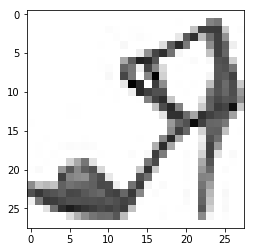

'Sandal'

In [15]:
index_fill = 1376 # replace with any value between 0 and 9999

reshape= np.matrix.reshape(train_images[index_fill],28,28)

import matplotlib.pyplot as plt
plt.imshow(reshape, cmap=plt.cm.binary)
plt.show()

encoded_train[index_fill]

# 2. Build densely connected network as a baseline

Every time you run a newer, more advanced model on your data, you would want to make sure you compare it with what you have learned. For that reason, let's look at a dense neural network as a baseline before diving into convolutional networks. As data is manipulated slightly differently in convolutional networks, let's perform data manipulation for the dense network, and we'll start over from scratch for the convolutional neural network.

Remember that the image data is stored in an array of shape (10000, 784) of type uint8 with values in the [0, 255] interval. To serve as input for the model, we want transform it into a float32 array of the same shape, but with values between 0 and 1 instead of 0 and 255.  

In [16]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

We're not quite done yet. Remember that instead of a label somewhere [0,9], neural networks generally use one-hot encoding. For this exercise, this means that the label for each observation is replaced by a vector containing 9 `0`'s and just 1 `1`, in the place of the label index.

You can use `to_categorical` in `keras.utils` to do this.

In [17]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels= to_categorical(test_labels)

Using TensorFlow backend.


From our 10,000 training set elements, let set 2000 aside for validation.

In [18]:
img_val = train_images[:2000]
partial_img_train  = train_images[2000:]
label_val = train_labels[:2000]
partial_label_train = train_labels[2000:]

Now, let's build our baseline network. You'll build two dense hidden layers, the first one with 128 hidden units, and the second one with 64 hidden units. Use the rectified linear unit as an activation function for both. Remember that the input shape is 28 x 28 for both layers. The last layer of the network should have a softmax activation function (because this is a multiclass problem), and 10 units.

Let's train the model for 50 epochs in batches of 128.

In [19]:
from keras import models
from keras import layers
dense = models.Sequential()
dense.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
dense.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
dense.add(layers.Dense(10, activation='softmax'))

dense.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

dense_fit = dense.fit(partial_img_train, 
                      partial_label_train, 
                      epochs=50, 
                      batch_size=128,
                      validation_data=(img_val, label_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 86us/step - loss: 0.9281 - acc: 0.6790 - val_loss: 0.8766 - val_acc: 0.6810
Epoch 2/50
8000/8000 [==============================] - 0s 52us/step - loss: 0.6091 - acc: 0.7820 - val_loss: 0.6782 - val_acc: 0.7655
Epoch 3/50
8000/8000 [==============================] - 0s 51us/step - loss: 0.5346 - acc: 0.8153 - val_loss: 0.5020 - val_acc: 0.8340
Epoch 4/50
8000/8000 [==============================] - 0s 51us/step - loss: 0.4831 - acc: 0.8280 - val_loss: 0.4554 - val_acc: 0.8485
Epoch 5/50
8000/8000 [==============================] - 0s 51us/step - loss: 0.4400 - acc: 0.8415 - val_loss: 0.5913 - val_acc: 0.7890
Epoch 6/50
8000/8000 [==============================] - 0s 49us/step - loss: 0.4193 - acc: 0.8481 - val_loss: 0.4726 - val_acc: 0.8170
Epoch 7/50
8000/8000 [==============================] - 0s 47us/step - loss: 0.3911 - acc: 0.8586 - val_loss: 0.5202 - val_acc: 0.8170
Epoch 8

Let's plot the evolution of the training versus validation loss along the epochs.

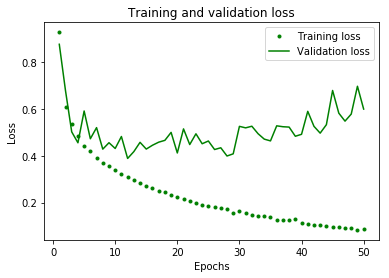

In [20]:
hist_dense = dense_fit.history
loss_values = hist_dense['loss']
val_loss_values = hist_dense['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let's plot the evolution of the training versus validation accuracy along the epochs.

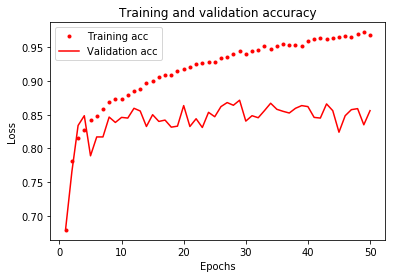

In [21]:
acc_values = hist_dense['acc'] 
val_acc_values = hist_dense['val_acc']

plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation accuracy and loss seem to be fairly volatile, but as we move along the epochs, the validation loss seems to go up again.
It seems appropriate to stop training after about ~20 epochs. Let's run the model again changing `epochs = 20`, and let's look at the results.

In [22]:
dense_final = models.Sequential()
dense_final.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
dense_final.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
dense_final.add(layers.Dense(10, activation='softmax'))

dense_final.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

dense_final_fit = dense_final.fit(partial_img_train, 
                                  partial_label_train, 
                                  epochs=20, 
                                  batch_size=128,
                                  validation_data=(img_val, label_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 97us/step - loss: 0.9816 - acc: 0.6594 - val_loss: 0.6845 - val_acc: 0.7825
Epoch 2/20
8000/8000 [==============================] - 0s 50us/step - loss: 0.6299 - acc: 0.7768 - val_loss: 0.5924 - val_acc: 0.8065
Epoch 3/20
8000/8000 [==============================] - 0s 50us/step - loss: 0.5506 - acc: 0.8010 - val_loss: 0.5624 - val_acc: 0.7920
Epoch 4/20
8000/8000 [==============================] - 0s 53us/step - loss: 0.4982 - acc: 0.8226 - val_loss: 0.5394 - val_acc: 0.8095
Epoch 5/20
8000/8000 [==============================] - 0s 53us/step - loss: 0.4615 - acc: 0.8337 - val_loss: 0.6917 - val_acc: 0.7530
Epoch 6/20
8000/8000 [==============================] - 0s 43us/step - loss: 0.4310 - acc: 0.8431 - val_loss: 0.5057 - val_acc: 0.8200
Epoch 7/20
8000/8000 [==============================] - 0s 53us/step - loss: 0.4085 - acc: 0.8544 - val_loss: 0.5190 - val_acc: 0.8155
Epoch 8

In [23]:
results_dense_final = dense_final.evaluate(test_images, test_labels)

2500/2500 [==============================] - 0s 51us/step


In [24]:
results_dense_final

[0.5025627148628234, 0.8256]

The test set classification accuracy is about 80%. Not bad, for a 10-fold classification and a fairly small data size. Let's see if we can do better with a convolutional net!

# 3. A convolutional network

## 3.1 Data pre-processing

The data needs to be pre-processed differently. Let's start again from scratch.

In [25]:
train_images, train_labels = mnist_reader.load_mnist( path = "data_zalando/",kind='train')
test_images, test_labels = mnist_reader.load_mnist(path = "data_zalando/", kind='t10k')

import random
index_train = range(0,59999)
index_test= range(0,9999)

random.seed(1109)
train_sample = sample(index_train,  10000)
test_sample = sample(index_test,  2500)

train_images = train_images[train_sample]
train_labels = train_labels[train_sample]
test_images = test_images[test_sample]
test_labels = test_labels[test_sample]

Where the input layer for a dense neural network is fine to be $(n\_obs, total\_n\_pixels)$, we want the training in data in convolutions to be $(n\_obs, horiz\_pixels, vertical\_pixels, num\_channels)$, because convolutions operate over 3D tensors, with two spatial axes (height and width) and a depth axis (also referred to as $channels$ axis). For an RGB image, the dimension of the depth axis is 3, because of the three color channels red, green, and blue. For a black-and-white picture the depth is 1 (levels of gray). We need to reshape train_images and test_images as follows:

In [26]:
train_images = train_images.reshape((10000, 28, 28, 1))
test_images = test_images.reshape((2500, 28, 28, 1))

Remember that the image data is stored in an array of shape (10000, 784) of type uint8 with values in the [0, 255] interval. To serve as input for the convolutional model, you'll need to transform it again into a float32 array of the same shape, but with values between 0 and 1 instead of 0 and 255.  

In [27]:
test_images = test_images.astype('float32') / 255
train_images = train_images.astype('float32') / 255

Let's perform one-hot encoding on the labels again! You can use `to_categorical` in `keras.utils` to do this.

In [28]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [29]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

Again, we'll want to split the training set up in actual training data and validation data.

In [30]:
img_val = train_images[:2000]
partial_img_train  = train_images[2000:]
label_val = train_labels[:2000]
partial_label_train = train_labels[2000:]

Let's look at exactly what convolutions do. A convolution starts by sliding "patches" over the input. Patches are typically 3 x 3 or 5 x 5. Because of patching, the output width and height will differ from the input and depend on 2 things:
- border effects
- The use of strides


The input shape for the first layer is (28, 28, 1), as previously discussed. For a convolutional layer, 2 additional decisions need to be made:
- The depth of the convolutional layer, also the number of filters created by the convolution.
- The dimensions of the so-called "patches" (generally 3 x 3 or 5 x 5).

Using keras, this can be programmed as follows:
`Conv2D(output_depth, (window_height, window_width))`

## 3.2 Running the first model

Use 3 convolutional layers (the first one with output depth 32, the latter two with output depth 64). Make sure all layers use 3x3 patches.

Then, to downsample feature maps use maxpooling layers in between the convolution layers. Use the common 2 × 2 window and stride 2, in order to downsample the feature maps by a factor of 2. 

In [31]:
# A small convnet
from keras import layers 
from keras import models

conv = models.Sequential()
conv.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
conv.add(layers.MaxPooling2D((2, 2)))
conv.add(layers.Conv2D(64, (3, 3), activation='relu')) 
conv.add(layers.MaxPooling2D((2, 2)))
conv.add(layers.Conv2D(64, (3, 3), activation='relu'))

# you can use `padding = valid` and `padding = same`. Strides \= 1 for convolutional layers are not very common

When convolutional networks, generally, dense layers are added towards the end of the network. First, we need to flatten the 3D outputs to 1D, and then we can add a few dense layers. Let's add one hidden layer with 64 units and relu, and again a softmax layer towards the end of the exercise.

In [32]:
conv.add(layers.Flatten())
conv.add(layers.Dense(64, activation='relu'))
conv.add(layers.Dense(10, activation='softmax'))

Note how the output layers change dimension. A summary of what exaclty is happening can be found using `.summary()`

In [33]:
conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                36928     
__________

Let's run this model, using 30 epochs and a batch size of 64. Use both the train data and the validation data in the model.

In [34]:
conv.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
conv_fit = conv.fit(partial_img_train, 
                      partial_label_train, 
                      epochs=30, 
                      batch_size=64,
                      validation_data=(img_val, label_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 12s 2ms/step - loss: 0.9896 - acc: 0.6346 - val_loss: 0.6304 - val_acc: 0.7625
Epoch 2/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.6027 - acc: 0.7740 - val_loss: 0.5063 - val_acc: 0.8210
Epoch 3/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.5137 - acc: 0.8103 - val_loss: 0.4750 - val_acc: 0.8220
Epoch 4/30
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4472 - acc: 0.8324 - val_loss: 0.4591 - val_acc: 0.8440
Epoch 5/30
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4002 - acc: 0.8508 - val_loss: 0.4759 - val_acc: 0.8285
Epoch 6/30
8000/8000 [==============================] - 9s 1ms/step - loss: 0.3715 - acc: 0.8662 - val_loss: 0.4009 - val_acc: 0.8575
Epoch 7/30
8000/8000 [==============================] - 8s 1ms/step - loss: 0.3429 - acc: 0.8725 - val_loss: 0.3840 - val_acc: 0.8665
Epoch 8/30


Let's plot the evolution of the training versus validation loss along the epochs again.

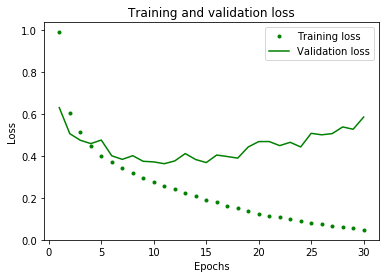

In [35]:
plt.clf()
hist_conv = conv_fit.history
loss_values = hist_conv['loss']
val_loss_values = hist_conv['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let's plot the evolution of the training versus validation loss along the epochs again.

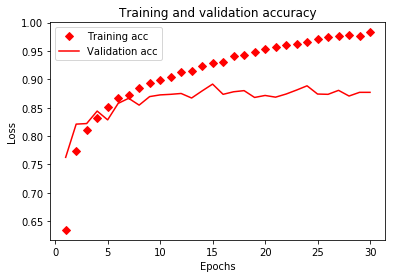

In [36]:
plt.clf()

acc_values = hist_conv['acc'] 
val_acc_values = hist_conv['val_acc']

plt.plot(epochs, acc_values, 'rD', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation accuracy and loss seem to be fairly volatile again, but as we move along the epochs, the validation loss definitely goes up. Here, seems appropriate to stop after about ~14 epochs. Let's retrain the entire model again.

In [37]:
conv_final = models.Sequential()
conv_final.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
conv_final.add(layers.MaxPooling2D((2, 2)))
conv_final.add(layers.Conv2D(64, (3, 3), activation='relu')) 
conv_final.add(layers.MaxPooling2D((2, 2)))
conv_final.add(layers.Conv2D(64, (3, 3), activation='relu'))

conv_final.add(layers.Flatten())
conv_final.add(layers.Dense(64, activation='relu'))
conv_final.add(layers.Dense(10, activation='softmax'))

conv_final.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
conv_final_fit = conv_final.fit(partial_img_train, 
                      partial_label_train, 
                      epochs=14, 
                      batch_size=64,
                      validation_data=(img_val, label_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/14
8000/8000 [==============================] - 9s 1ms/step - loss: 0.9957 - acc: 0.6381 - val_loss: 0.6227 - val_acc: 0.7580
Epoch 2/14
8000/8000 [==============================] - 8s 1ms/step - loss: 0.6065 - acc: 0.7751 - val_loss: 0.5110 - val_acc: 0.8055
Epoch 3/14
8000/8000 [==============================] - 8s 1ms/step - loss: 0.5143 - acc: 0.8055 - val_loss: 0.4721 - val_acc: 0.8325
Epoch 4/14
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4467 - acc: 0.8364 - val_loss: 0.4552 - val_acc: 0.8355
Epoch 5/14
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4071 - acc: 0.8520 - val_loss: 0.4054 - val_acc: 0.8550
Epoch 6/14
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3710 - acc: 0.8645 - val_loss: 0.4331 - val_acc: 0.8400
Epoch 7/14
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3423 - acc: 0.8778 - val_loss: 0.3828 - val_acc: 0.8595
Epoch 8/14
8

In [38]:
results_conv_final = conv_final.evaluate(test_images, test_labels)

2500/2500 [==============================] - 1s 355us/step


In [39]:
results_conv_final

[0.5010738526105881, 0.8308]

The test set classification accuracy is 86.3%. Coming from 83.6 in the sequential model this is about a 3% improvement. For bigger data sets this could even be more! Let's see if we can still improve our model!

## 3.3 Using drop-out regularization

Note how we "early stopping" to fight overfitted models. Recall that there is another method, dropout regularization, to counter overfitting. Rerun our `conv` model, yet with a dropout layer right before the densely connected classifier, with parameter 0.5.

In [40]:
conv_drop = models.Sequential()
conv_drop.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
conv_drop.add(layers.MaxPooling2D((2, 2)))
conv_drop.add(layers.Conv2D(64, (3, 3), activation='relu')) 
conv_drop.add(layers.MaxPooling2D((2, 2)))
conv_drop.add(layers.Conv2D(64, (3, 3), activation='relu'))

conv_drop.add(layers.Flatten())
conv_drop.add(layers.Dropout(0.5))
conv_drop.add(layers.Dense(64, activation='relu'))
conv_drop.add(layers.Dense(10, activation='softmax'))

conv_drop.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
conv_drop_fit = conv_drop.fit(partial_img_train, 
                      partial_label_train, 
                      epochs=30, 
                      batch_size=64,
                      validation_data=(img_val, label_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 10s 1ms/step - loss: 1.1409 - acc: 0.5790 - val_loss: 0.6595 - val_acc: 0.7515
Epoch 2/30
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6822 - acc: 0.7434 - val_loss: 0.5341 - val_acc: 0.7975
Epoch 3/30
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5822 - acc: 0.7810 - val_loss: 0.4841 - val_acc: 0.8205
Epoch 4/30
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5344 - acc: 0.8009 - val_loss: 0.4611 - val_acc: 0.8330
Epoch 5/30
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4895 - acc: 0.8176 - val_loss: 0.4568 - val_acc: 0.8345
Epoch 6/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4523 - acc: 0.8330 - val_loss: 0.4098 - val_acc: 0.8520
Epoch 7/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4305 - acc: 0.8417 - val_loss: 0.3842 - val_acc: 0.8650
Epoch 8/30


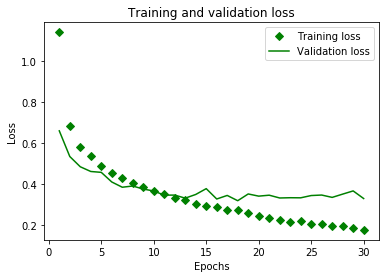

In [41]:
plt.clf()
hist_conv_drop = conv_drop_fit.history
loss_values = hist_conv_drop['loss']
val_loss_values = hist_conv_drop['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'gD', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

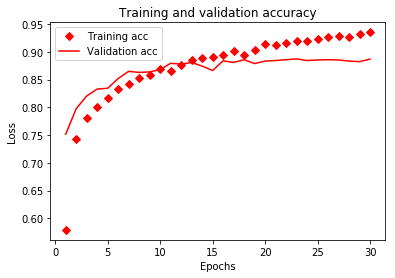

In [42]:
plt.clf()

acc_values = hist_conv_drop['acc'] 
val_acc_values = hist_conv_drop['val_acc']

plt.plot(epochs, acc_values, 'rD', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Note how the dropout regularization made the curves much smoother! Additionally, the respective accuracies and losses don't diverge to the extent they did before. Let's stop after 20 epochs.

In [43]:
conv_drop_final = models.Sequential()
conv_drop_final.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
conv_drop_final.add(layers.MaxPooling2D((2, 2)))
conv_drop_final.add(layers.Conv2D(64, (3, 3), activation='relu')) 
conv_drop_final.add(layers.MaxPooling2D((2, 2)))
conv_drop_final.add(layers.Conv2D(64, (3, 3), activation='relu'))

conv_drop_final.add(layers.Flatten())
conv_drop_final.add(layers.Dropout(0.5))
conv_drop_final.add(layers.Dense(64, activation='relu'))
conv_drop_final.add(layers.Dense(10, activation='softmax'))

conv_drop_final.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
conv_drop_final_fit = conv_drop_final.fit(partial_img_train, 
                      partial_label_train, 
                      epochs=20, 
                      batch_size=64,
                      validation_data=(img_val, label_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 9s 1ms/step - loss: 1.1092 - acc: 0.5890 - val_loss: 0.6542 - val_acc: 0.7570
Epoch 2/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6869 - acc: 0.7384 - val_loss: 0.5358 - val_acc: 0.7995
Epoch 3/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5848 - acc: 0.7785 - val_loss: 0.4774 - val_acc: 0.8255
Epoch 4/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5248 - acc: 0.8016 - val_loss: 0.4718 - val_acc: 0.8325
Epoch 5/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4824 - acc: 0.8194 - val_loss: 0.4279 - val_acc: 0.8495
Epoch 6/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4498 - acc: 0.8377 - val_loss: 0.4007 - val_acc: 0.8610
Epoch 7/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4200 - acc: 0.8430 - val_loss: 0.3839 - val_acc: 0.8650
Epoch 8/20
800

In [44]:
results = conv_drop_final.evaluate(test_images, test_labels)

2500/2500 [==============================] - 1s 335us/step


In [45]:
results

[0.3697879765033722, 0.8772]

Look at this! You were able to increase the test set accuracy by almost 1% (being 86.3% for the model without dropout regularization).

## 3.4 Making predictions

In [46]:
predictions = conv_drop_final.predict(test_images)
index_test = 2

In [47]:
predictions[index_test]

array([1.6703776e-03, 4.4905173e-04, 1.1980664e-04, 9.7992730e-01,
       1.3026144e-02, 3.7134825e-07, 4.7840574e-03, 6.7047727e-06,
       9.5350024e-06, 6.7378478e-06], dtype=float32)

In [48]:
test_labels[index_test]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

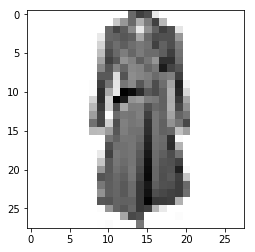

'Coat'

In [49]:
reshape= np.matrix.reshape(test_images[index_test],28,28)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(reshape, cmap=plt.cm.binary)
plt.show()

encoded_test[index_test]

This coat is incorrectly classified as a dress! Not really surprising, looking at it, right?

## 3.5 Try tweaking the model yourself!

The possibilities are literally endless!
- add/remove layers
- In some layers, change `padding = valid` and `padding = same`
- change activation functions
- change optimizer
- change batch size
- change patch dimensions (from 3 x 3 to 5 x 5)
- If you have more time, try running everything on the bigger training set! Do results improve?

## 3.6 Visualizations (WIP, maybe)

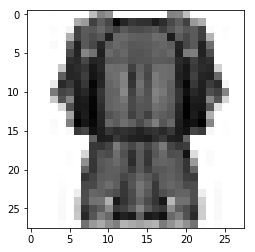

'Shirt'

In [50]:
index_fill = 1219 # replace by any value between 0 and 9999

reshape= np.matrix.reshape(train_images[index_fill],28,28)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(reshape, cmap=plt.cm.binary)
plt.show()

encoded_train[index_fill]

In [51]:
from keras import models
layer_outputs = [layer.output for layer in conv_final.layers[:8]] 
activation_model = models.Model(inputs=conv_final.input, outputs=layer_outputs)

In [52]:
interm_tensor = np.expand_dims(train_images[index_test], axis=0) 
interm_tensor /= 255

In [53]:
interm_tensor

array([[[[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [1.4302192e-03],
         [3.2141483e-03],
         [3.0449827e-03],
         [2.9527105e-03],
         [3.1064975e-03],
         [3.0296040e-03],
         [3.0757401e-03],
         [3.1987696e-03],
         [3.1833909e-03],
         [3.2602844e-03],
         [3.3064208e-03],
         [8.1507111e-04],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [3.1218762e-03],
         [3.7062669e-03],
         [

In [54]:
activations = activation_model.predict(interm_tensor)

In [55]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


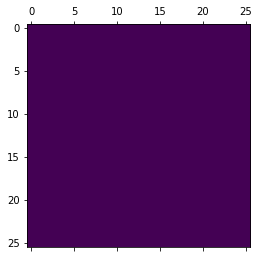

In [56]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

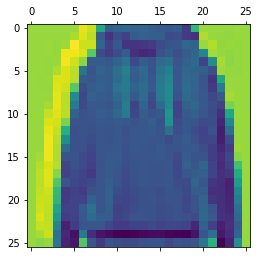

In [57]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')